# U.S. Medical Insurance Costs

Project Goals:
1. Explore averages, minimum & maximum values, along with other statistical values for numerical columns (Age, BMI, Number of Children, Insurance Cost)
2. Perform regional analysis using region column
3. Analyse the value/effect of smokers versus non smokers, including the average additional value smoking places on the costs.
4. Use age column to calculate how many people have at least one child versus people who do not have any and the percentage of the total costs against the total without children.

In [28]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('insurance.csv')

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Goal 1 (Averages)
1. Average Age = 39 years old
2. Average BMI = 30.7
3. Average Number of Children = 1
4. Average Insurance Cost = $13,270.42

Goal 2 (Minimum)
1. Minimum Age = 18 years old
2. Minimum BMI = 16.0
3. Minimum Number of Children = 0
4. Minimum Insurance Cost = $1,121.87

Goal 3 (Maximum)
1. Maximum Age = 64 years old
2. Maximum BMI = 53.1
3. Maximum Number of Children = 5
4. Maximum Insurance Cost = $63,770.43

<AxesSubplot:xlabel='region', ylabel='count'>

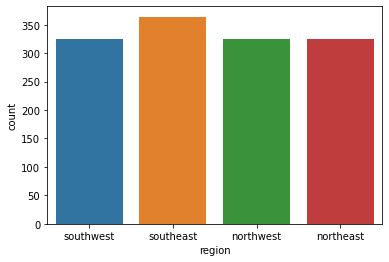

In [25]:
sns.countplot(x='region', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

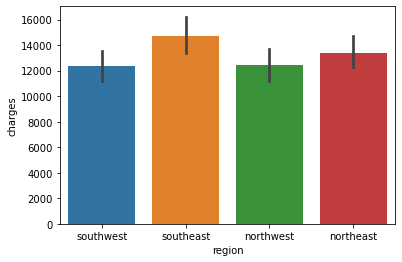

In [21]:
sns.barplot(x='region', y='charges', data=df)

In summary of my regional analysis I have noted that the East coast has larger insurance costs than the West coast which might be attributed to many factors such as climate, lifestyle etc. More analysis could be performed on age, demographic factors etc for further detailed analysis I would segregate the information in relation to age, life expectency and maybe some health care statistics to make further assumptions.

<AxesSubplot:xlabel='region', ylabel='charges'>

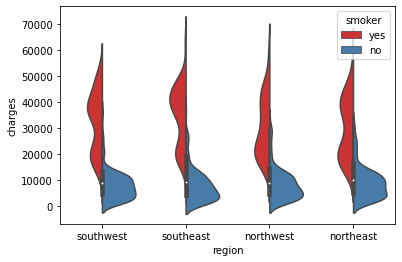

In [23]:
sns.violinplot(x='region', y='charges', data=df, hue='smoker', split=True, palette='Set1')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

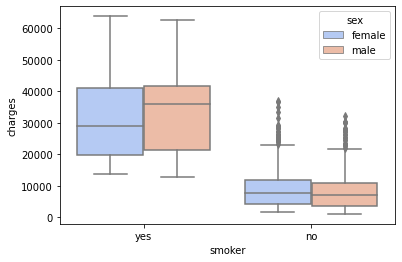

In [24]:
sns.boxplot(x='smoker', y='charges', hue='sex', data=df, palette='coolwarm')

Clearly smokers expect to pay more insurance costs than non smokers but what I find interesting at least initially is a slight difference in men paying more than women if they smoke but potentially less than women if they do not smoke. More details could be sought to try and justify some potential differences which could be attributed to regional differences already discussed in previous goal summaries.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

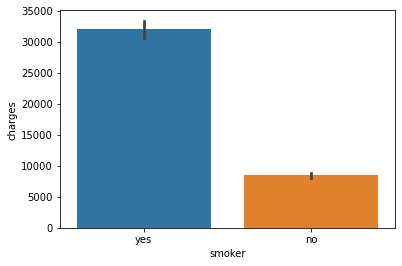

In [26]:
sns.barplot(x='smoker', y='charges', data=df)

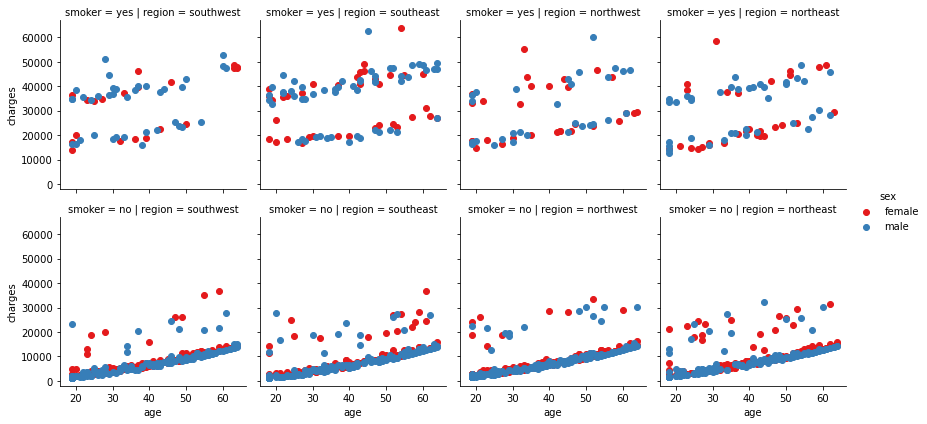

In [33]:
g = sns.FacetGrid(df, col='region',  row='smoker', hue='sex', palette='Set1')
g = g.map(plt.scatter, 'age', 'charges').add_legend()

It is quite apparent non smokers are paying less in insurance costs than smokers but this plot also demonstrates the differences in age costs against regional variances and some slight differences in both male and female charges too.

In [35]:
df_smoker = df.groupby('smoker')

In [37]:
df_smoker.describe().transpose()

smoker                    no           yes
age      count   1064.000000    274.000000
         mean      39.385338     38.514599
         std       14.083410     13.923186
         min       18.000000     18.000000
         25%       26.750000     27.000000
         50%       40.000000     38.000000
         75%       52.000000     49.000000
         max       64.000000     64.000000
bmi      count   1064.000000    274.000000
         mean      30.651795     30.708449
         std        6.043111      6.318644
         min       15.960000     17.195000
         25%       26.315000     26.083750
         50%       30.352500     30.447500
         75%       34.430000     35.200000
         max       53.130000     52.580000
children count   1064.000000    274.000000
         mean       1.090226      1.113139
         std        1.218136      1.157066
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        1.000000      1.000000
         75%        2.000000      2.000000
         max        5.000000      5.000000
charges  count   1064.000000    274.000000
         mean    8434.268298  32050.231832
         std     5993.781819  11541.547176
         min     1121.873900  12829.455100
         25%     3986.438700  20826.244213
         50%     7345.405300  34456.348450
         75%    11362.887050  41019.207275
         max    36910.608030  63770.428010

The insurance cost differences purely based on smokers or non smokers is:
1. Non Smoker Average Insurance Cost is 8,434.27 dollars
2. Smoker Average Insurance Cost is 32,050.23 dollars

In [38]:
df_age = df.groupby('children')

In [42]:
df_age.describe().transpose()

children                  0             1             2             3  \
age     count    574.000000    324.000000    240.000000    157.000000   
        mean      38.444251     39.453704     39.445833     41.566879   
        std       16.436228     12.067445     11.588715     12.206174   
        min       18.000000     18.000000     18.000000     18.000000   
        25%       22.000000     30.000000     30.000000     31.000000   
        50%       36.000000     40.000000     40.000000     41.000000   
        75%       55.000000     49.000000     48.000000     52.000000   
        max       64.000000     64.000000     64.000000     64.000000   
bmi     count    574.000000    324.000000    240.000000    157.000000   
        mean      30.550296     30.623148     30.978104     30.684331   
        std        6.039106      6.101435      6.509644      5.787173   
        min       15.960000     16.815000     16.815000     18.905000   
        25%       26.143750     26.615000     25.786250     27.265000   
        50%       30.302500     30.015000     31.640000     30.495000   
        75%       34.746250     34.237500     35.357500     34.320000   
        max       53.130000     52.580000     48.070000     46.530000   
charges count    574.000000    324.000000    240.000000    157.000000   
        mean   12365.975602  12731.171832  15073.563734  15355.318367   
        std    12023.293942  11823.631451  12891.368347  12330.869484   
        min     1121.873900   1711.026800   2304.002200   3443.064000   
        25%     2734.421150   4791.643175   6284.939438   6652.528800   
        50%     9856.951900   8483.870150   9264.979150  10600.548300   
        75%    14440.123825  15632.052050  20379.276748  19199.944000   
        max    63770.428010  58571.074480  49577.662400  60021.398970   

children                  4             5  
age     count     25.000000     18.000000  
        mean      39.000000     35.611111  
        std       12.138094     10.123583  
        min       18.000000     19.000000  
        25%       29.000000     28.750000  
        50%       39.000000     39.000000  
        75%       48.000000     42.500000  
        max       61.000000     52.000000  
bmi     count     25.000000     18.000000  
        mean      31.391200     29.605000  
        std        4.627211      7.139686  
        min       24.415000     18.300000  
        25%       28.215000     24.302500  
        50%       29.640000     28.550000  
        75%       33.660000     33.055000  
        max       41.470000     46.750000  
charges count     25.000000     18.000000  
        mean   13850.656311   8786.035247  
        std     9139.223321   3808.435525  
        min     4504.662400   4687.797000  
        25%     7512.267000   5874.973900  
        50%    11033.661700   8589.565050  
        75%    17128.426080  10019.943975  
        max    40182.246000  19023.260000

The average cost of insurance for all people without children was slightly lower than that of people who had at least one child but when people has 5 children their insurance cost was the lowest. This might be as a result of some of the other variables such as sex or smoking so further analysis should be carried out.
The percentage split between people having at least one child and people having no children was around 57% having > 1 child and 43% having no children.